In [1]:
import pandas as pd
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
from corner import corner
import glob

In [48]:
injs = pd.read_json('population.json')

(array([ 1.,  0.,  4.,  7.,  8., 10.,  6.,  7.,  3.,  4.]),
 array([-0.40419494, -0.32601744, -0.24783993, -0.16966243, -0.09148492,
        -0.01330742,  0.06487008,  0.14304759,  0.22122509,  0.29940259,
         0.3775801 ]),
 <BarContainer object of 10 artists>)

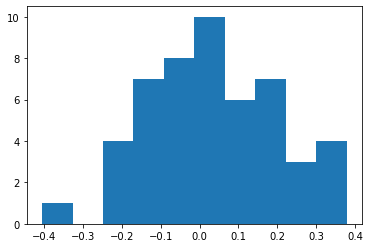

In [49]:
inj_numbers = np.loadtxt('injlist.txt',dtype=int)
a1s = injs.a1
a2s = injs.a2

chieffs = a1s[inj_numbers]
plt.hist(chieffs)

(array([ 1.,  0.,  4.,  7.,  8., 10.,  6.,  7.,  3.,  4.]),
 array([-0.40419494, -0.32601744, -0.24783993, -0.16966243, -0.09148492,
        -0.01330742,  0.06487008,  0.14304759,  0.22122509,  0.29940259,
         0.3775801 ]),
 <BarContainer object of 10 artists>)

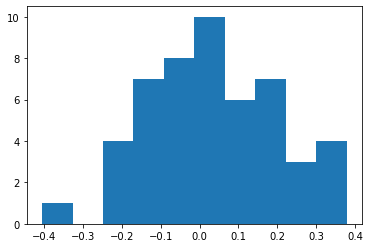

In [50]:
injections = pd.read_json('population.json')
test  = np.array([injections.iloc[job].a1 for job in inj_numbers])
test2  = np.array([injections.loc[job].a1 for job in inj_numbers])
plt.hist(test)

In [13]:
f = "output/job_44551_result.json"
with open(f,'r') as jf:
    result = json.load(jf)

In [27]:
m1 = 38.
m2 = 28.

q = m2/m2
eta = q/(1+q)**2
mc = eta**(3./5.)*(m1+m2)
print(mc)

28.728168588772096


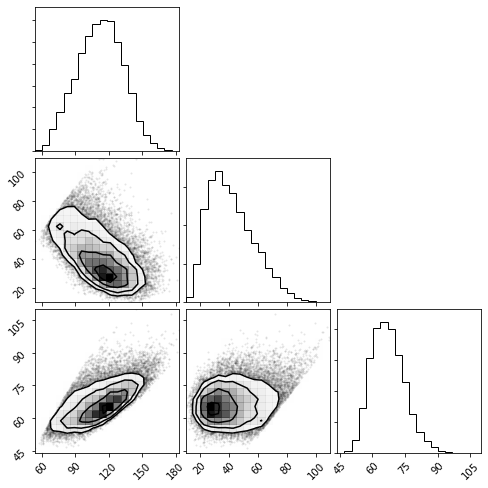

In [14]:
m1 = np.array(result['posterior']['content']['mass_1_source'])
m2 = np.array(result['posterior']['content']['mass_2_source'])

q = m2/m2
eta = q/(1+q)**2
mc = eta**(3./5.)*(m1+m2)

corner(np.transpose([m1,m2,mc]))
plt.show()

output/job_47229_result.json
output/job_30043_result.json
output/job_18852_result.json
output/job_09396_result.json
output/job_07332_result.json
output/job_17008_result.json
output/job_48339_result.json
output/job_31849_result.json
output/job_24860_result.json
output/job_46612_result.json
output/job_26971_result.json
output/job_12960_result.json
output/job_23185_result.json
output/job_44380_result.json
output/job_07690_result.json
output/job_07278_result.json
output/job_44551_result.json
output/job_28026_result.json
output/job_44306_result.json
output/job_28941_result.json
output/job_04988_result.json
output/job_21720_result.json
output/job_18338_result.json
output/job_44531_result.json
output/job_17804_result.json
output/job_13446_result.json
output/job_04399_result.json
output/job_40025_result.json
output/job_31823_result.json
output/job_31253_result.json
output/job_47535_result.json
[0.2643081614, 0.9812257835851016, 4.946572461640535, 0.0443542847334214]
5.736272823310953 5.6285787

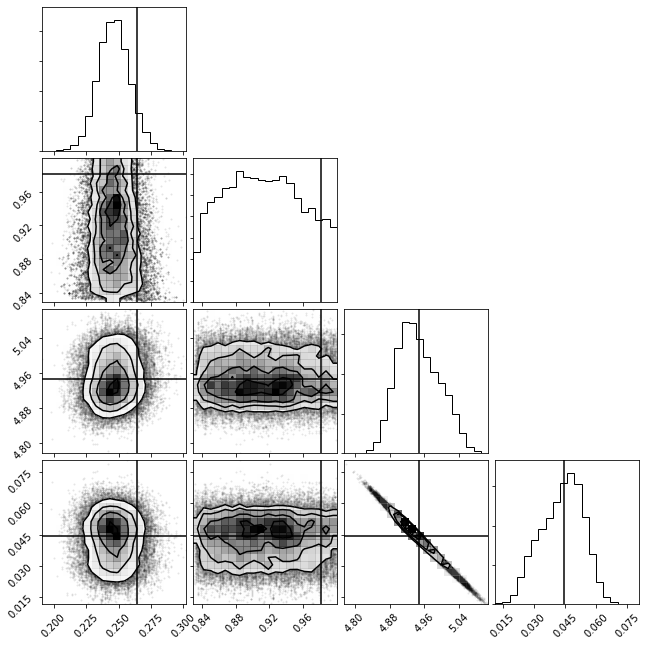

output/job_17749_result.json
output/job_39076_result.json
output/job_09637_result.json
output/job_48080_result.json
output/job_20118_result.json
output/job_03055_result.json
output/job_22313_result.json
output/job_18548_result.json
output/job_05473_result.json
output/job_20864_result.json
output/job_38614_result.json
output/job_40531_result.json
output/job_18456_result.json
output/job_30628_result.json
output/job_33902_result.json
output/job_44971_result.json
output/job_36098_result.json
output/job_22408_result.json
output/job_22398_result.json


In [3]:
files = glob.glob('output/*result.json')
for  ff in files:
    
    print(ff)
    key = ff.split('_')[-2]
    if key not in ["47535"]:
        continue
    
    with open(ff,'r') as jf:
        result = json.load(jf)
        
    inj_chi = result['injection_parameters']['chi_eff']
    inj_q = result['injection_parameters']['mass_ratio']
    inj_m1 = result['injection_parameters']['mass_1_source']
    inj_m2 = result['injection_parameters']['mass_2_source']
    inj_z = result['injection_parameters']['redshift']['content']
    inj_Mc = (inj_q/(1.+inj_q)**2)**(3./5.)*(inj_m1+inj_m2)
    inj_params = [inj_chi,inj_q,inj_Mc,inj_z]
    print(inj_params)
    print(inj_m1,inj_m2)

    chiEff = np.array(result['posterior']['content']['chi_eff'])
    m1 = np.array(result['posterior']['content']['mass_1_source'])
    m2 = np.array(result['posterior']['content']['mass_2_source'])
    z = np.array(result['posterior']['content']['redshift'])
    s1z =  np.array(result['posterior']['content']['spin_1z'])
    s2z =  np.array(result['posterior']['content']['spin_2z'])

    q = m2/m1
    Mc = (q/(1.+q)**2)**(3./5.)*(m1+m2)

    ndim = 4
    fig = corner(np.transpose([chiEff,q,Mc,z]))
    axes = np.array(fig.axes).reshape((ndim, ndim))

    for i in range(ndim):
        ax = axes[i, i]
        ax.axvline(inj_params[i], color="black")

    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axvline(inj_params[xi], color="black")
            ax.axhline(inj_params[yi], color="black")
    plt.show()

In [6]:
result.keys()

dict_keys(['label', 'outdir', 'sampler', 'log_evidence', 'log_evidence_err', 'log_noise_evidence', 'log_bayes_factor', 'priors', 'injection_parameters', 'meta_data', 'search_parameter_keys', 'fixed_parameter_keys', 'constraint_parameter_keys', 'sampling_time', 'sampler_kwargs', 'use_ratio', 'log_likelihood_evaluations', 'log_prior_evaluations', 'samples', 'nested_samples', 'parameter_labels', 'parameter_labels_with_unit', 'version'])

03055
1811.0637656564718


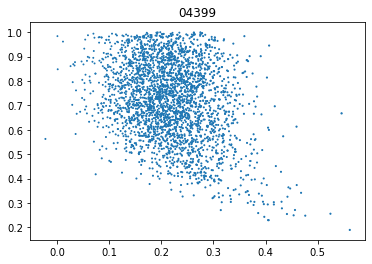

2215.6801254983825


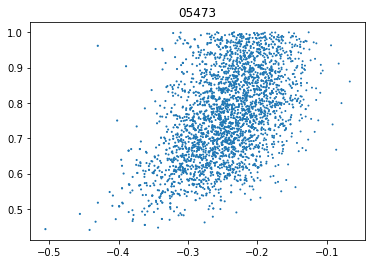

1531.3692008512164


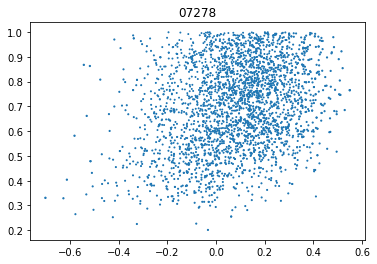

2426.093370461333


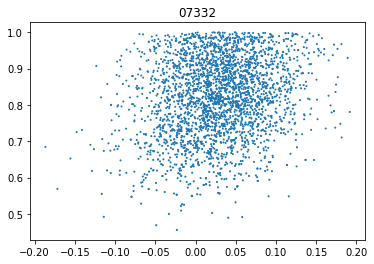

276.15858358392126


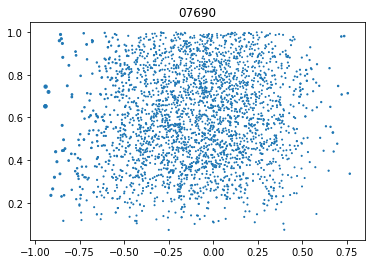

1697.1966284455023


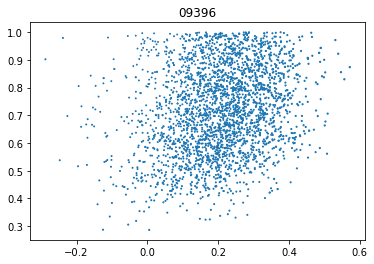

1823.9970569158006


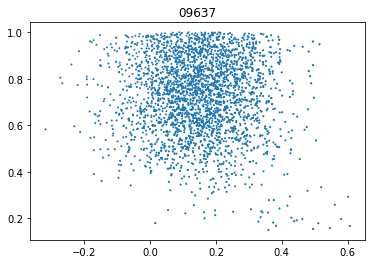

179.4472432114523


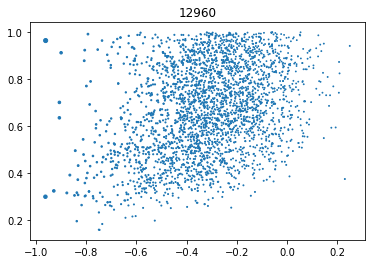

1994.4863632243428


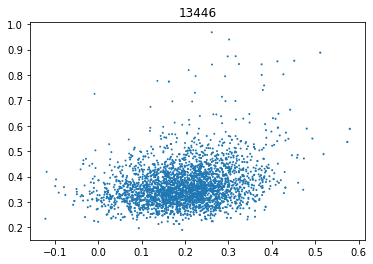

1621.0576169074682


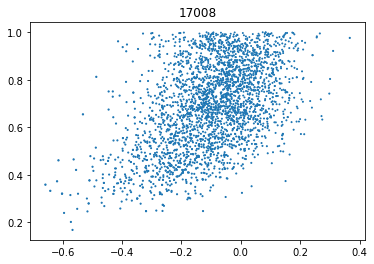

1104.4605902321175


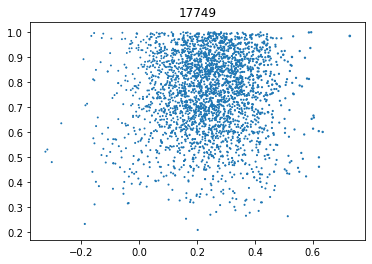

2213.058986700165


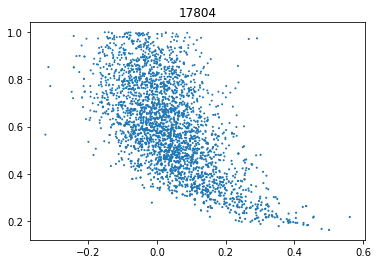

18338
149.80563162233204


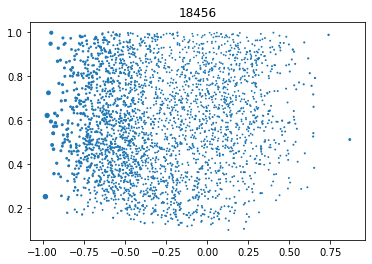

18548
543.0161604772043


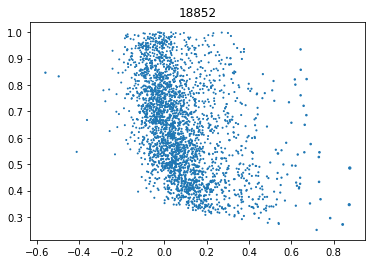

1493.4577852463017


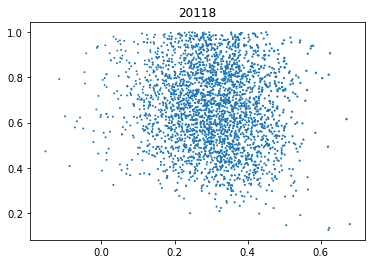

196.16168211808386


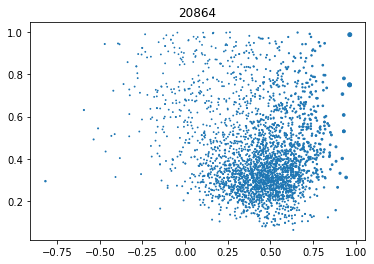

181.2824223658024


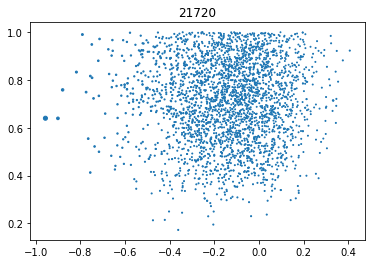

2743.6757669874814


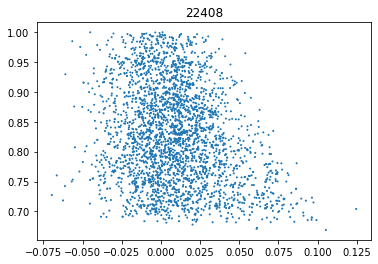

23185
1302.4564705538974


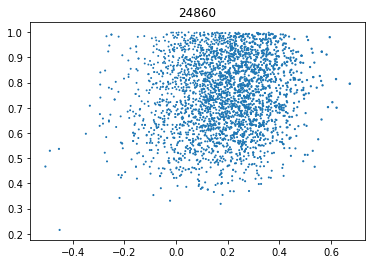

194.52969510364247


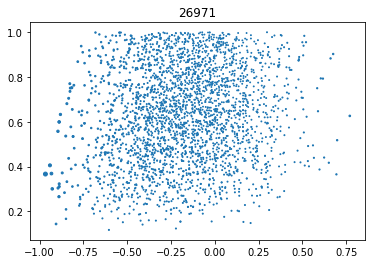

1765.147612645877


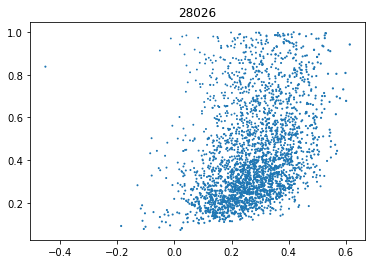

1353.360374300125


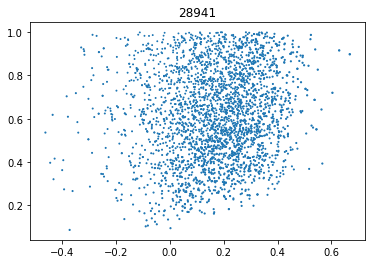

30043
469.557035290816


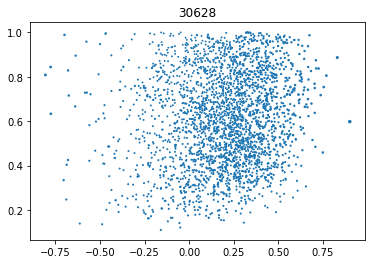

2298.8125141683777


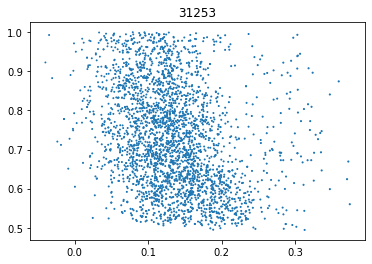

235.4252873125763


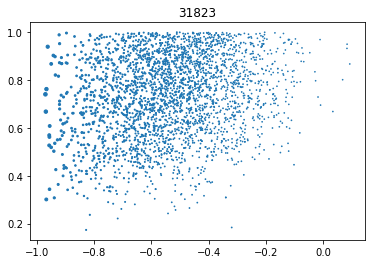

353.68187443527864


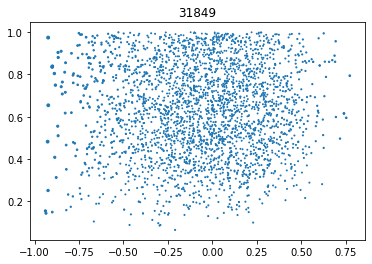

1544.5815797568478


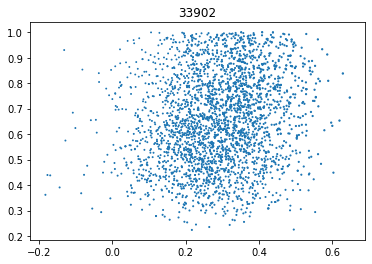

2220.658577995196


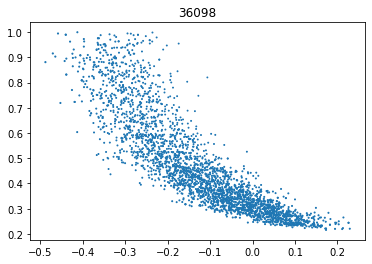

201.59001440225796


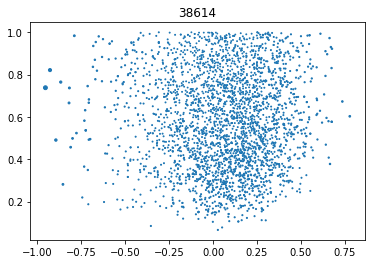

2144.349986140476


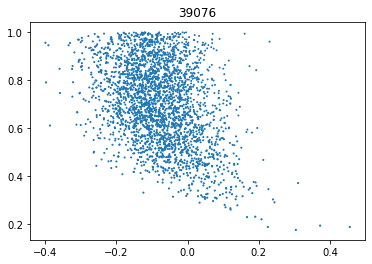

364.6808843568623


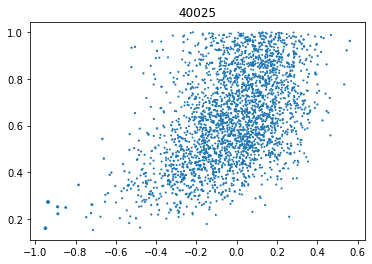

848.0555561301


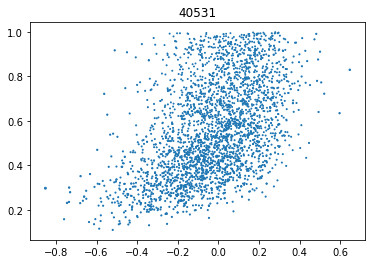

44306
1311.0086971119126


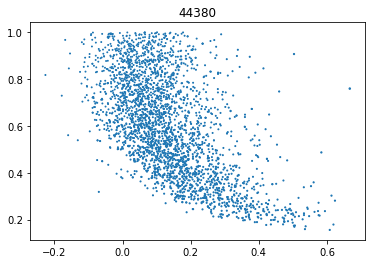

576.7581222655225


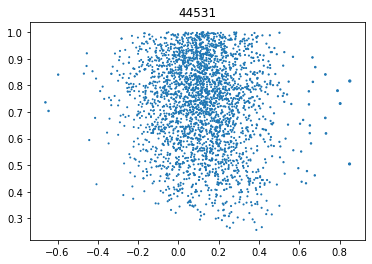

271.84145408469664


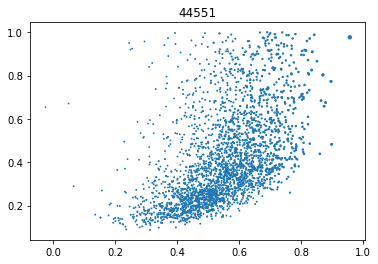

841.7760199158804


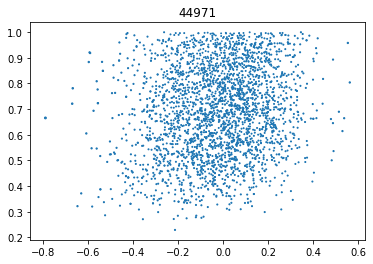

46612
2058.027028848065


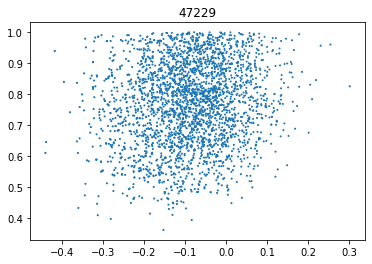

47535
1212.118614123133


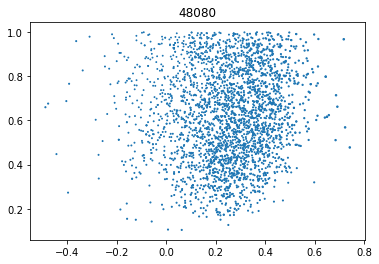

334.66959539401296


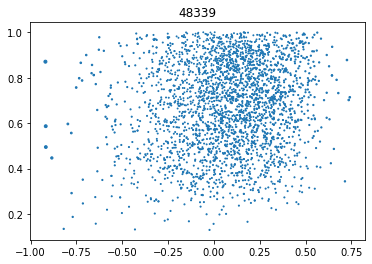

In [71]:
# Dicts with samples: 
bad = ["30043","46612","23185","44306","18338","47535","03055","18548"]
singleEvents = np.sort(glob.glob('./tmp/job*'))
for i,eventFile in enumerate(singleEvents):
    key = eventFile.split('_')[1].split('.')[0]
    if key in bad:
        print(key)
        continue
    else:
        dataDict = np.load(eventFile,allow_pickle=True,encoding='latin1')[()]
        xeff = dataDict['Xeff']
        q = dataDict['m2']/dataDict['m1']
        priors = dataDict['Xeff_priors']
        
        weights = 1/priors
        
        print(np.sum(weights)/np.max(weights))
        
        fig,ax = plt.subplots()
        ax.scatter(xeff,q,s=weights/np.mean(weights))
        ax.set_title(key)
        plt.show()